# Exoplanet Transmission Spectral Library

### Data
* [transmission spectra data](http://www.astro.ex.ac.uk/people/sing/David_Sing/Spectral_Library.html) 

### Paper
* [Sing et al. 2016](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1512.04341)

1D models are also available with relevant citations listed in the file (e.g. Fortney et al. 2010).

In [1]:
!python --version

Python 3.5.3 :: Continuum Analytics, Inc.


In [2]:
import pandas as pd
import numpy as np

print(pd.__version__,np.__version__)

0.19.2 1.12.1


In [3]:
source='http://www.astro.ex.ac.uk/people/sing/spectra/WASP-17b.model.txt'

data=pd.read_table(source, sep=' ',skiprows=5)

#get only specific columns
df=data[data.columns[[1,-1]]]
#label data with planet name
df.name = 'WASP-17b'
df.columns=['Wavelength','Rp/Rs']
#display top 5
df.head()

,Wavelength,Rp/Rs
0,0.30168,0.124663
1,0.30280,0.124641
2,0.30392,0.124619
3,0.30504,0.124598
4,0.30616,0.124576


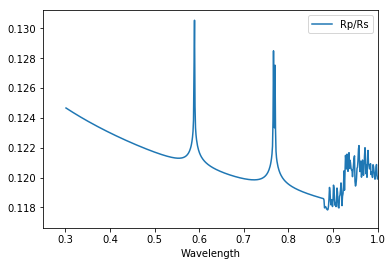

In [4]:
%matplotlib inline
df.plot('Wavelength','Rp/Rs',xlim=(0.25,1))

In [5]:
planets ='WASP-17b,WASP-39b,WASP-19b,HAT-P-1b,WASP-31b,WASP-12b,HAT-P-12b,HD189733b,WASP-6b,WASP-121b,HD209458b'.split(',')

#save each df into a dictionary, DF
DF={}

for i in planets:
    url='http://www.astro.ex.ac.uk/people/sing/spectra/'+i+'.model.txt'
    print(i)#url
    try:
        d=pd.read_table(url, sep=' ',skiprows=6)
        df=d[d.columns[[1,-1]]]
        df.name = str(i)
        df.columns=['Wavelength','Rp/Rs']
        DF[i]=df
    except Exception as e:
        print(e)

WASP-17b
WASP-39b
WASP-19b
HAT-P-1b
WASP-31b
WASP-12b
HAT-P-12b
HD189733b
WASP-6b
WASP-121b
Error tokenizing data. C error: Expected 13 fields in line 2505, saw 14

HD209458b


In [6]:
DF['WASP-17b'].head()

,Wavelength,Rp/Rs
0,0.30280,0.124641
1,0.30392,0.124619
2,0.30504,0.124598
3,0.30616,0.124576
4,0.30728,0.124555


# Spectra

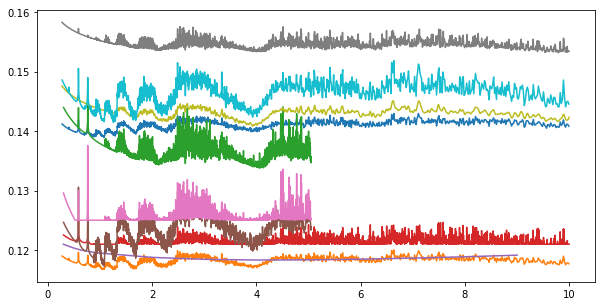

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#to plot spectrum one by one
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

for i in DF.keys():
    ax.plot(DF[i]['Wavelength'],DF[i]['Rp/Rs'])

plt.show()

## Optical spectra

(0.2, 1)

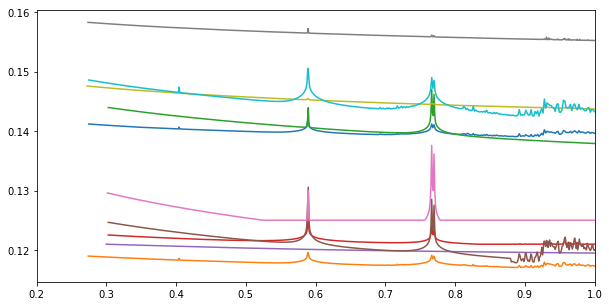

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
for i in DF.keys():
    ax.plot(DF[i]['Wavelength'],DF[i]['Rp/Rs'])

plt.xlim([0.2,1])

## Near-infrared (J,H,K)

(1, 2.5)

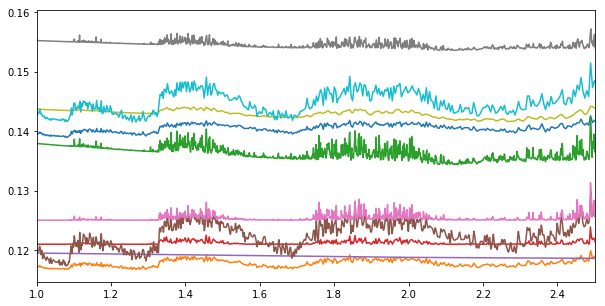

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
for i in DF.keys():
    ax.plot(DF[i]['Wavelength'],DF[i]['Rp/Rs'])

plt.xlim([1,2.5])

## Planet params

Get info on each system using data from open exoplanet catalog. Let's its API called exodata.

[ExoData paper](http://arxiv.org/pdf/1510.02738v1.pdf)


In [10]:
import exodata
print(exodata.__version__)
#load catalog
exocat = exodata.load_db_from_url()

2.1.6


In [11]:
WASP17 = exocat.searchPlanet('WASP17')
WASP17.star

Star('WASP-17')

In [12]:
WASP17.star.M

array(1.306) * M_s

In [13]:
planet_params = [exocat.searchPlanet(str(i)) for i in planets]
planet_params

[Planet('WASP-17 b'),
 Planet('WASP-39 b'),
 Planet('WASP-19 b'),
 Planet('HAT-P-1 b'),
 Planet('WASP-31 b'),
 Planet('WASP-12 b'),
 Planet('HAT-P-12 b'),
 Planet('HD 189733 A b'),
 Planet('WASP-6 b'),
 Planet('WASP-121 b'),
 Planet('HD 209458 b')]

In [14]:
planet_params[0].M

array(0.486) * M_j

Convert to kg:

In [15]:
import exodata.astroquantities as aq

planet_params[0].M.rescale(aq.kg)

array(9.227196000000001e+26) * kg

In [16]:
float(planet_params[0].M.magnitude)

0.486

Planet masses

In [17]:
mass = [float(planet_params[j].M.magnitude) for j in range(len(planet_params))]

Put in a dataframe

In [18]:
df_params = pd.DataFrame(mass, index=planets, columns = ['mass'])

Planet radii

In [19]:
radius = [float(planet_params[j].R.magnitude) for j in range(len(planet_params))]

In [20]:
#add radius
df_params['radius'] = radius 
df_params

,mass,radius
WASP-17b,0.486,1.991
WASP-39b,0.280,1.270
WASP-19b,1.168,1.386
HAT-P-1b,0.524,1.217
WASP-31b,0.478,1.537
WASP-12b,1.404,1.736
HAT-P-12b,0.211,0.959
HD189733b,1.138,1.138
WASP-6b,0.503,1.224
WASP-121b,1.183,1.807


/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


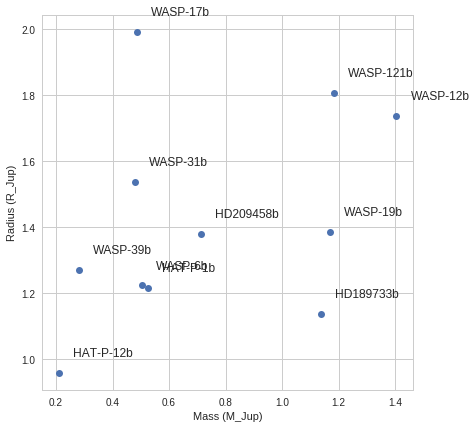

In [21]:
#df_params.plot(x='mass', y='radius', kind='scatter')

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(df_params['mass'], df_params['radius'], 'o')

counter=0
for x,y in zip(df_params.mass, df_params.radius):
    ax.text(x+0.05,y+0.05, df_params.index[counter])
    counter+=1
    
plt.xlabel('Mass (M_Jup)')
plt.ylabel('Radius (R_Jup)')

Caclulate parameters

In [27]:
from exodata.equations import ScaleHeight as H

In [32]:
H?
#H?? for thorough details

In [24]:
planet_params[0].P

array(3.735438) * d

In [25]:
from exodata.equations import KeplersThirdLaw
KeplersThirdLaw(a=planet_params[0].a, M_s=planet_params[0].star.M).P

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/quantities/quantity.py:379: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return self.magnitude == other


array(3.7339177714860403) * d

Results are similar above.

transit parameters

In [58]:
planet_dict = [exocat.planetDict[str(i)[:-1]+' b'] for i in planets]

KeyError: 'HD 189733 b'

In [74]:
planets ='WASP-17b,WASP-39b,WASP-19b,HAT-P-1b,WASP-31b,WASP-12b,HAT-P-12b,WASP-6b,WASP-121b,HD 209458b'.split(',')

planet_dict = []
for i in planets:
    try:
        planet_dict.append(exocat.planetDict[str(i)[:-1]+' b'])
    except Exception as e:
        print(e)
planet_dict

[Planet('WASP-17 b'),
 Planet('WASP-39 b'),
 Planet('WASP-19 b'),
 Planet('HAT-P-1 b'),
 Planet('WASP-31 b'),
 Planet('WASP-12 b'),
 Planet('HAT-P-12 b'),
 Planet('WASP-6 b'),
 Planet('WASP-121 b'),
 Planet('HD 209458 b')]

In [75]:
planet_dict[0].calcTransitDuration(circular=True)

array(259.91194625787614) * min